# Importing functions

In [2]:
from common import load_image, show_image, load_data, split_data, validation_scores

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Load data
df = load_data()

# Split data
X_train, X_test, y_train, y_test = split_data(df)
# Preview shape of split data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5335, 256) (5335,) (1334, 256) (1334,)


## Standard Scaling, Random Forest Ensemble

In [ ]:
## Simple example of running an experiment
# Create a pipeline
pipe_standard_bagging = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=0)
)
# Define parameters and options
param_grid = {
    'randomforestclassifier__max_depth': [1, 2, 3, 4, 5]
}
# Get results for grid search with each of the 3 required scoring metrics 
results = validation_scores(pipe_standard_bagging, param_grid, X_train, y_train)
# Take a look at the validation results
print('Validation results:')
print(results)

c:\Users\Cristian\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Validation results:
{'accuracy':    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       1.253517      0.093214  ...        0.013353                5
1       2.357124      0.113799  ...        0.007432                4
2       3.272353      0.119384  ...        0.006252                3
3       4.064666      0.202297  ...        0.005981                1
4       4.893054      0.166787  ...        0.006068                2

[5 rows x 13 columns], 'roc_auc':    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       1.600046      0.152527  ...        0.006221                5
1       2.624730      0.127320  ...        0.002744                4
2       3.201042      0.154334  ...        0.001984                3
3       5.073143      0.872748  ...        0.001714                2
4       6.041243      0.934828  ...        0.001688                1

[5 rows x 13 columns], 'f1_score':    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score

NameError: name 'plt' is not defined

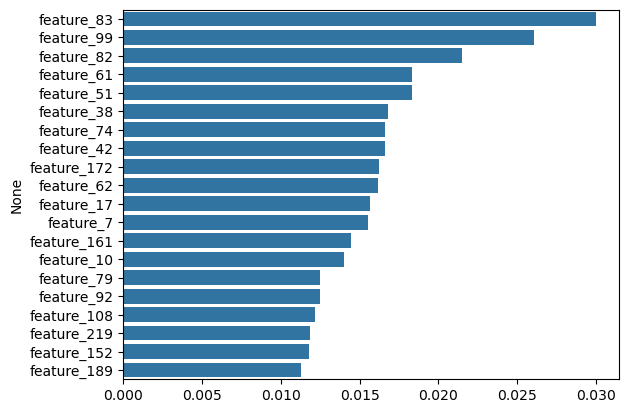

In [16]:
import numpy as np
import seaborn as sns

pipe_standard_bagging_fitted = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=0, max_depth=4)
)
pipe_standard_bagging_fitted.fit(X_train, y_train)
rfModel = pipe_standard_bagging_fitted.named_steps['randomforestclassifier']

importances = np.mean([
    tree.feature_importances_ for tree in rfModel.estimators_
], axis=0)

feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]  # Indices of features sorted by importance

# Extract top 10 features
top_20_indices = sorted_indices[:20]
top_20_features = feature_names[top_20_indices]
top_20_importances = importances[top_20_indices]

# Plot
sns.barplot(x=top_20_importances, y=top_20_features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Minmax Scaling, Random Forest Ensemble

In [9]:
pipe_minmax_bagging = make_pipeline(
    MinMaxScaler(),
    RandomForestClassifier(random_state=0)
)

param_grid = {
    'randomforestclassifier__max_depth': [1, 2, 3, 4, 5]
}

results = validation_scores(pipe_minmax_bagging, param_grid, X_train, y_train)

print('Validation results:')
print(results)

c:\Users\Cristian\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Validation results:
{'accuracy':    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       1.154195      0.092110  ...        0.013353                5
1       1.700066      0.092624  ...        0.007432                4
2       2.637032      0.036973  ...        0.006252                3
3       4.380724      0.115230  ...        0.005981                1
4       4.928840      0.281084  ...        0.006068                2

[5 rows x 13 columns], 'roc_auc':    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       1.403167      0.107708  ...        0.006221                5
1       2.372379      0.106107  ...        0.002744                4
2       3.477500      0.180008  ...        0.001984                3
3       4.141257      0.307258  ...        0.001714                2
4       4.668140      0.332978  ...        0.001688                1

[5 rows x 13 columns], 'f1_score':    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score

## MinMax Scaling, Gradient Boosted Ensemble

In [11]:
pipe_minmax_adaboost = make_pipeline(
    MinMaxScaler(),
    GradientBoostingClassifier(random_state=0)
)

param_grid = {
    'gradientboostingclassifier__max_depth': [1, 2, 3]
}

results = validation_scores(pipe_minmax_adaboost, param_grid, X_train, y_train)

print('Validation results:')
print(results)

c:\Users\Cristian\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


KeyboardInterrupt: 

## Standard Scaler, Gradient Boosting Ensemble

In [ ]:
pipe_standard_adaboost = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=0)
)

param_grid = {
    'gradientboostingclassifier__max_depth': [1, 2, 3]
}

results = validation_scores(pipe_standard_adaboost, param_grid, X_train, y_train)

print('Validation results:')
print(results)

c:\Users\Cristian\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
c:\Users\Cristian\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Cristian\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Cristian\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6.

Validation results:
{'accuracy':    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.469312      0.052822         0.045915        0.004332   
1      12.895718      0.191243         0.058071        0.020100   
2      19.300928      0.417355         0.046103        0.004290   
3      25.297743      0.574914         0.044304        0.005515   
4      30.848286      0.184355         0.047210        0.004262   

   param_adaboostclassifier__estimator__max_depth  \
0                                               1   
1                                               2   
2                                               3   
3                                               4   
4                                               5   

                                            params  split0_test_score  \
0  {'adaboostclassifier__estimator__max_depth': 1}           0.624438   
1  {'adaboostclassifier__estimator__max_depth': 2}           0.740630   
2  {'adaboostclassifier__e